# Airbnb Price Correlation

In [4]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
import pandas as pd
import numpy as np
import requests
import urllib.request
import scipy as sc
from lxml import html
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [115]:
df = pd.read_csv('airbnb_final_clean.csv')

df.tail()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
44460,45049,House,Private room,1,1.0,0.0,1,"{TV,Wifi,Air conditioning,Heating,Smoke detect...",89,338,78,1,0,43554.5,173,0
44461,45050,Apartment,Private room,2,1.0,1.0,1,"{TV,Wifi,Air conditioning,Kitchen,Free parking...",90,338,25,1,0,43554.5,365,0
44462,45051,House,Private room,2,1.0,1.0,2,"{TV,Wifi,Air conditioning,Kitchen,Free parking...",47,338,78,1,0,43554.5,347,0
44463,45052,Apartment,Entire home/apt,3,1.0,1.0,1,"{TV,Wifi,Air conditioning,Kitchen,Pets allowed...",105,500,115,1,0,43554.5,253,0
44464,45053,House,Shared room,16,3.0,1.0,1,"{TV,Wifi,Air conditioning,Kitchen,Washer,Dryer...",28,338,10,1,25,43554.5,90,0


In [116]:
df.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
0,1,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,Cable TV,Internet,Wifi,Air conditioning,Wh...",122,500,240,3,25,42505.0,165,2
1,2,House,Entire home/apt,6,1.0,3.0,3,"{TV,Cable TV,Internet,Wifi,Air conditioning,Po...",168,0,100,6,0,43394.0,0,6
2,3,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,Air conditioning,Wheelchair acc...",79,480,87,1,0,43680.0,276,21
3,4,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,Sm...",140,338,100,1,0,43680.0,346,19
4,5,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,Cable TV,Internet,Wifi,Air conditioning,Ki...",80,100,75,1,25,43554.5,0,0


In [117]:
df.describe()

,id,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
count,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000,44465.000000
mean,22431.127786,3.696683,1.459732,1.436658,1.989093,213.929203,421.402159,87.525987,1.963387,15.631890,43553.492005,161.266434,33.678871
std,13021.932752,2.686596,0.970023,1.122995,1.670216,589.310807,2170.819800,87.639671,1.801905,26.852471,286.829321,137.794200,59.810754
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,40265.000000,0.000000,0.000000
25%,11146.000000,2.000000,1.000000,1.000000,1.000000,70.000000,100.000000,35.000000,1.000000,0.000000,43554.500000,22.000000,1.000000
50%,22320.000000,3.000000,1.000000,1.000000,1.000000,110.000000,300.000000,78.000000,1.000000,10.000000,43674.000000,135.000000,9.000000
75%,33724.000000,5.000000,2.000000,2.000000,2.000000,188.000000,338.000000,100.000000,2.000000,24.000000,43705.000000,316.000000,39.000000
max,45053.000000,24.000000,16.000000,22.000000,50.000000,25000.000000,250000.000000,2500.000000,24.000000,300.000000,43722.000000,365.000000,900.000000


#### Data Cleaning

In [118]:
df.dtypes

id                     int64
property_type         object
room_type             object
accommodates           int64
bathrooms            float64
bedrooms             float64
beds                   int64
amenities             object
price                  int64
security_deposit       int64
cleaning_fee           int64
guests_included        int64
extra_people           int64
last_review          float64
availability_365       int64
number_of_reviews      int64
dtype: object

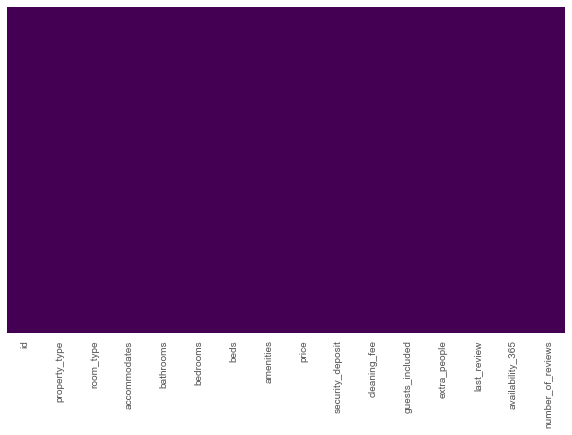

In [119]:
#finding null values in dataframe - No Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [120]:
df.tail()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
44460,45049,House,Private room,1,1.0,0.0,1,"{TV,Wifi,Air conditioning,Heating,Smoke detect...",89,338,78,1,0,43554.5,173,0
44461,45050,Apartment,Private room,2,1.0,1.0,1,"{TV,Wifi,Air conditioning,Kitchen,Free parking...",90,338,25,1,0,43554.5,365,0
44462,45051,House,Private room,2,1.0,1.0,2,"{TV,Wifi,Air conditioning,Kitchen,Free parking...",47,338,78,1,0,43554.5,347,0
44463,45052,Apartment,Entire home/apt,3,1.0,1.0,1,"{TV,Wifi,Air conditioning,Kitchen,Pets allowed...",105,500,115,1,0,43554.5,253,0
44464,45053,House,Shared room,16,3.0,1.0,1,"{TV,Wifi,Air conditioning,Kitchen,Washer,Dryer...",28,338,10,1,25,43554.5,90,0


In [121]:
df=df.drop(['id'], axis=1)

In [122]:
df.to_csv("Airbnb_proj.csv")

In [123]:
df.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,last_review,availability_365,number_of_reviews
0,Apartment,Entire home/apt,6,2.0,2.0,3,"{TV,Cable TV,Internet,Wifi,Air conditioning,Wh...",122,500,240,3,25,42505.0,165,2
1,House,Entire home/apt,6,1.0,3.0,3,"{TV,Cable TV,Internet,Wifi,Air conditioning,Po...",168,0,100,6,0,43394.0,0,6
2,Apartment,Private room,1,1.5,1.0,1,"{Internet,Wifi,Air conditioning,Wheelchair acc...",79,480,87,1,0,43680.0,276,21
3,Apartment,Private room,1,1.0,1.0,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,Sm...",140,338,100,1,0,43680.0,346,19
4,Apartment,Entire home/apt,2,1.0,1.0,1,"{TV,Cable TV,Internet,Wifi,Air conditioning,Ki...",80,100,75,1,25,43554.5,0,0


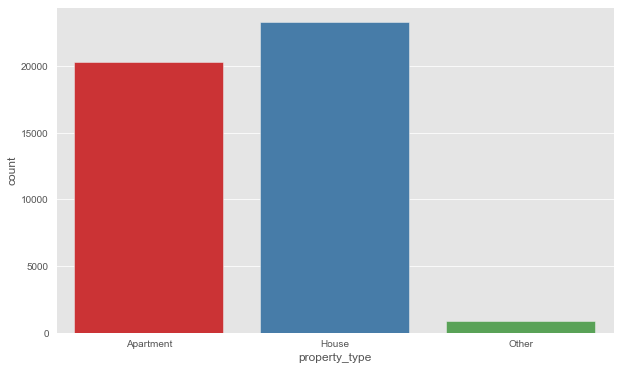

In [124]:
sns.countplot(x="property_type",data=df,palette="Set1")

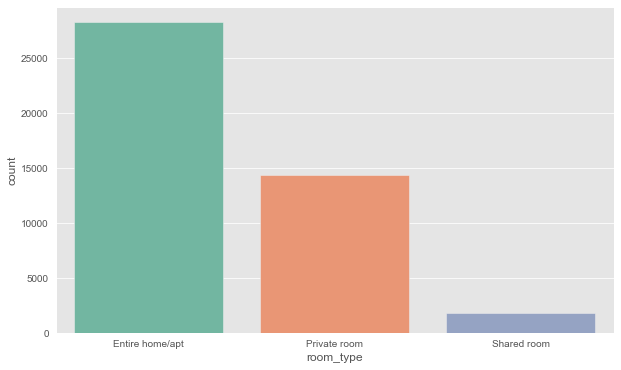

In [125]:
sns.countplot(x="room_type",data=df,palette="Set2")

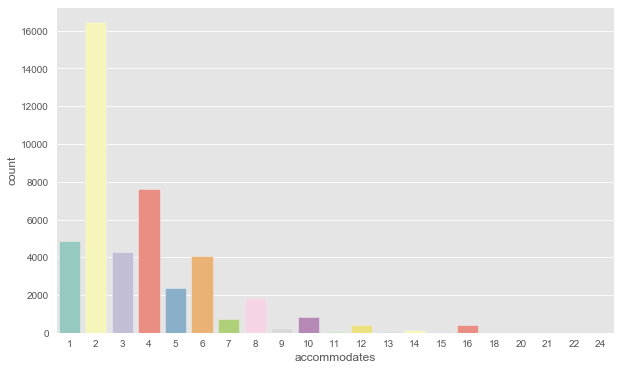

In [126]:
sns.countplot(x="accommodates",data=df,palette="Set3")

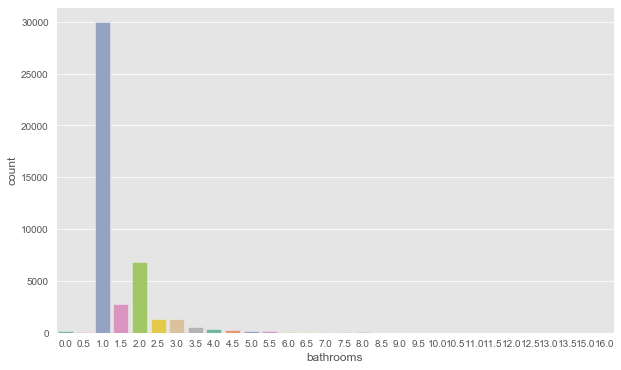

In [127]:
sns.countplot(x="bathrooms",data=df,palette="Set2")

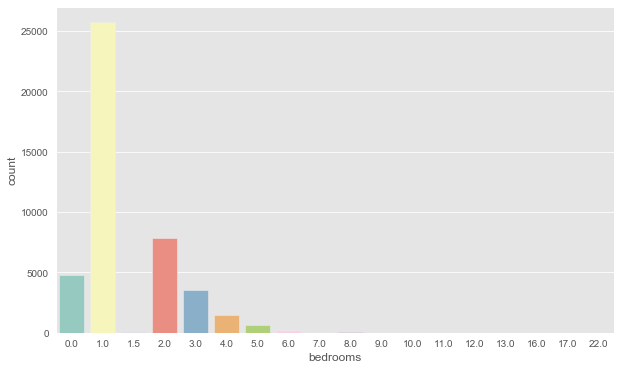

In [128]:
sns.countplot(x="bedrooms",data=df,palette="Set3")

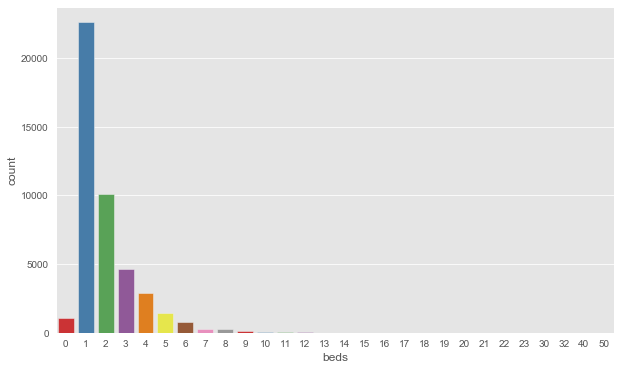

In [129]:
sns.countplot(x="beds",data=df,palette="Set1")

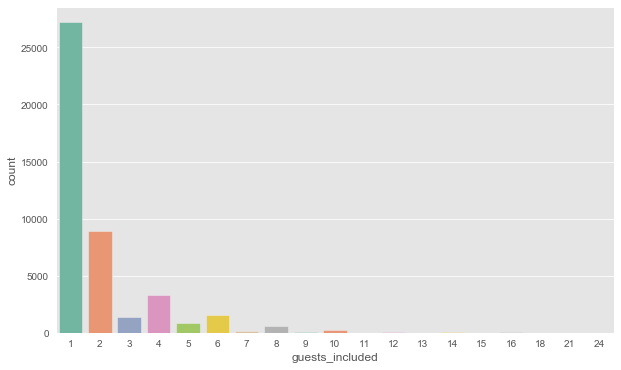

In [130]:
sns.countplot(x="guests_included",data=df,palette="Set2")

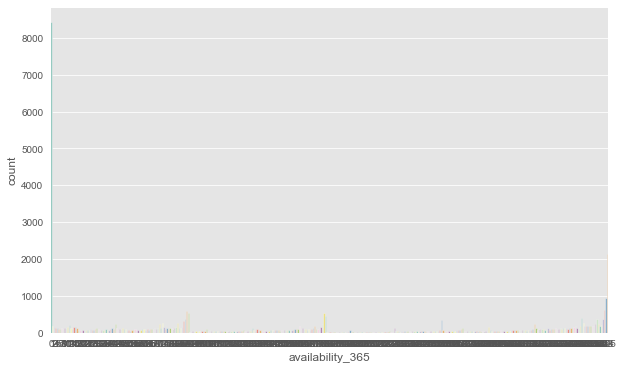

In [131]:
sns.countplot(x="availability_365",data=df,palette="Set3")

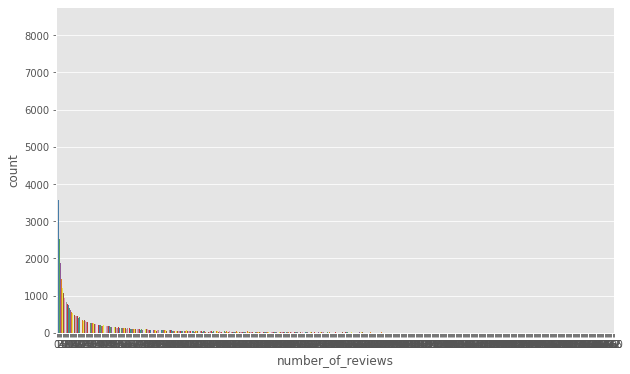

In [51]:
sns.countplot(x="number_of_reviews",data=df,palette="Set1")

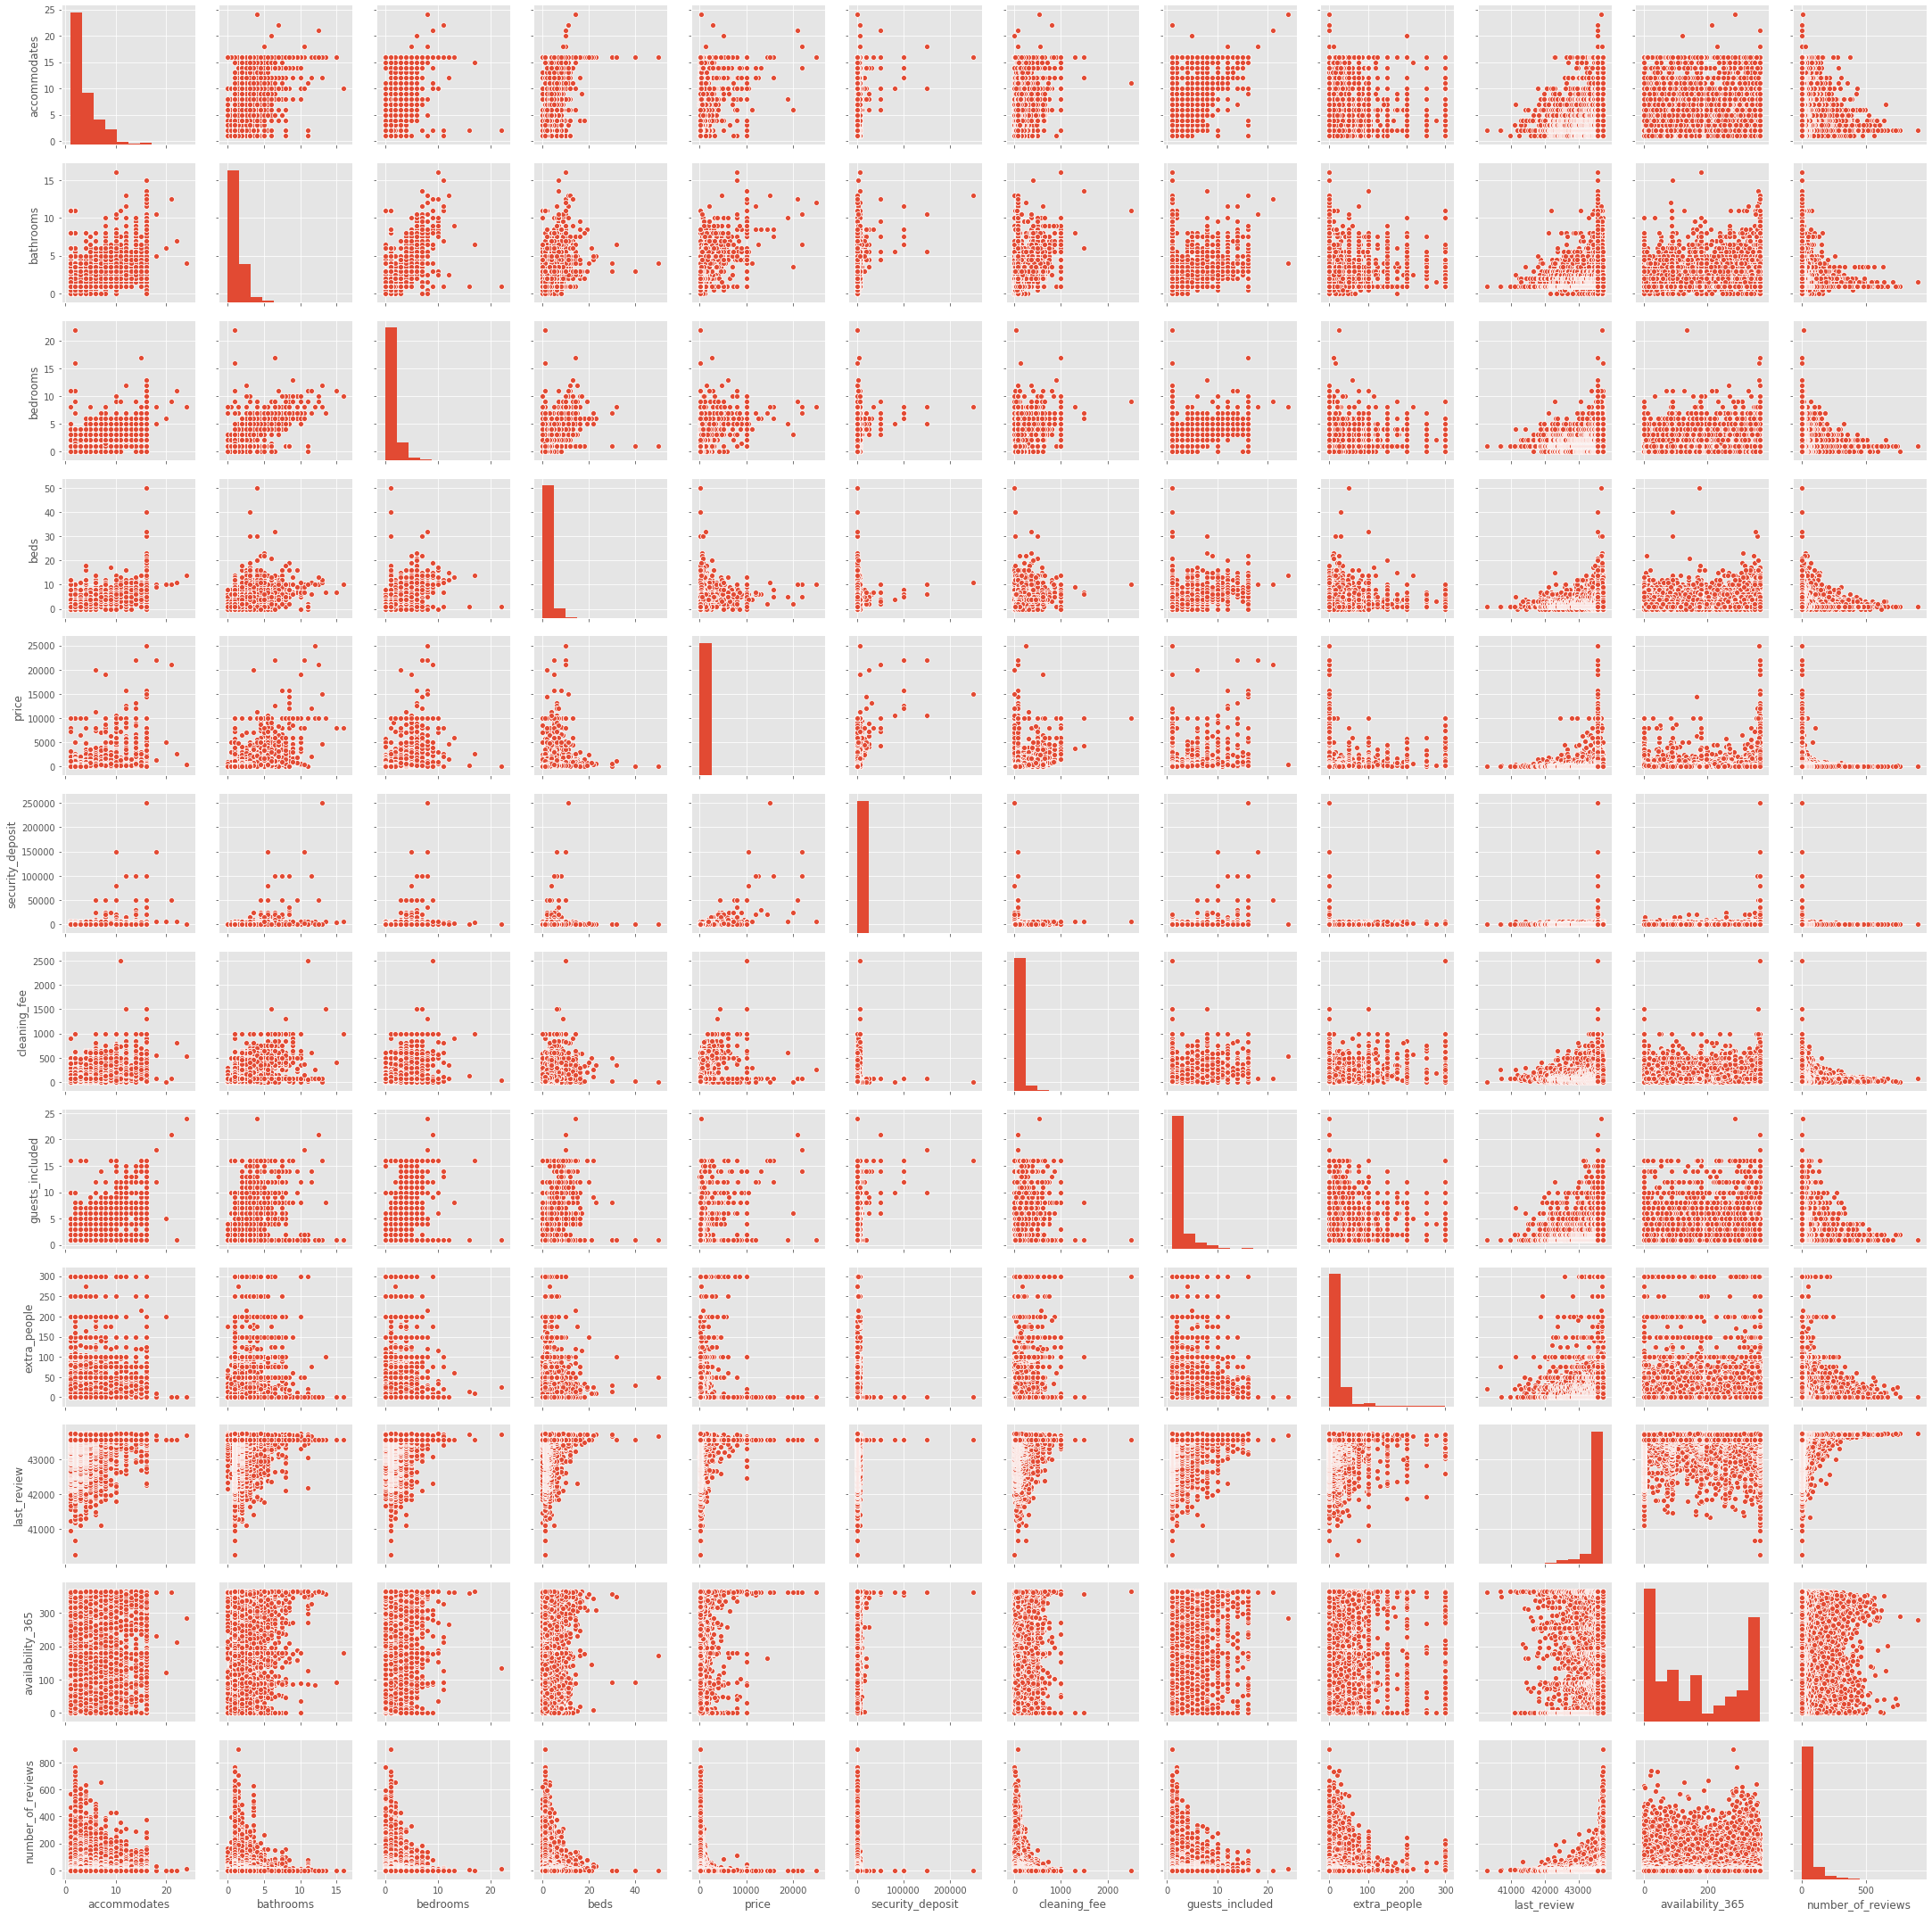

In [61]:
sns.pairplot(df[["property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "amenities", "price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "last_review", "availability_365", "number_of_reviews"]])


#### A pairplot is a very concise way to check the relationship between variables. In our case above, we can see within the 12x12 pairplot that there is a good enough relationship between the independent variable price and some of the dependent variables such as accommodates, bathrooms, bedrooms, extra_people, last_review and number_of_reviews.

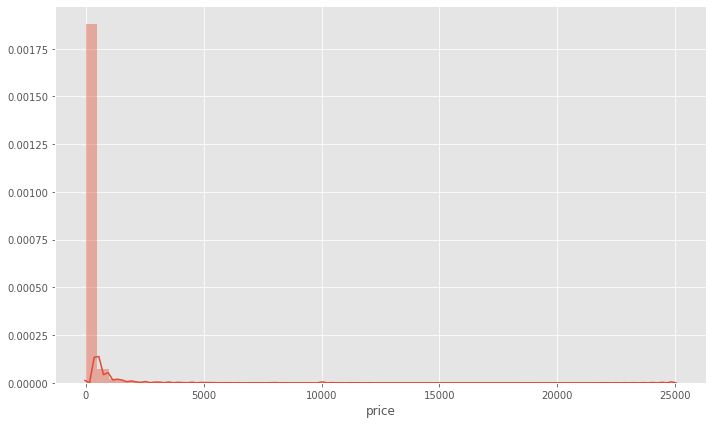

In [62]:
#Distribution of Price in California
sns.distplot(df["price"])
plt.tight_layout()

#### The distribution plot above shows that we have a vast majority of the apartments priced between 0 and 1000 dollars.

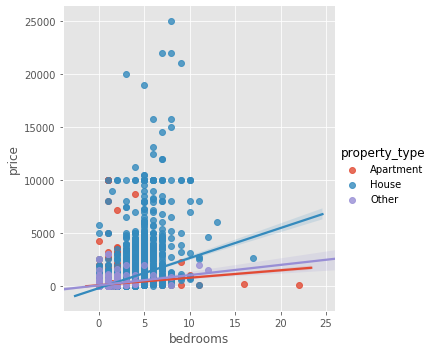

In [72]:
sns.lmplot("bedrooms","price", data=df, hue="property_type")

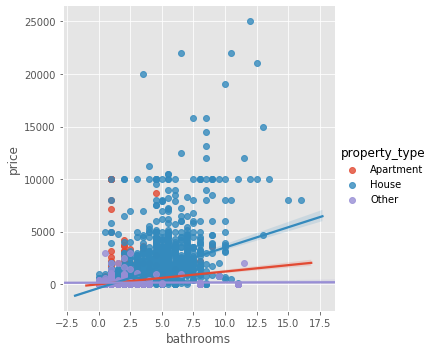

In [69]:
sns.lmplot("bathrooms","price", data=df, hue="property_type")

#### We have plotted a relationship between Price & Beds and Price & Bathrooms separately. By setting the hue as Property Type, we can see that these two variables have good linear relationship but there are some outliers too given that our data comes from California and these outliers are the extremely affulent areas that happen to be offered under the Airbnb utility.

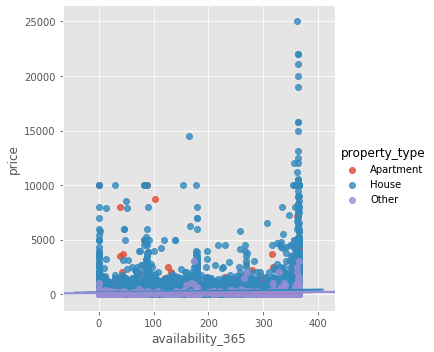

In [70]:
sns.lmplot("availability_365","price", data=df, hue="property_type")

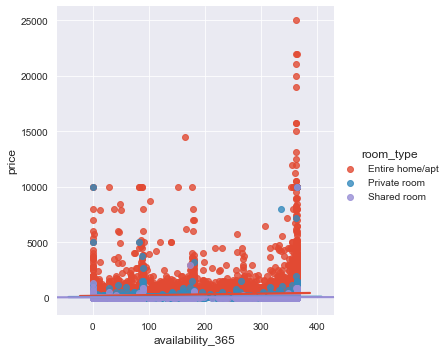

In [86]:
sns.lmplot("availability_365","price", data=df, hue="room_type")

#### The above visualization yields no conslusive results other than to show that those extraneous properties are full-time Airbnb units offered 365 days a year and that those properties are offered as entire units. 

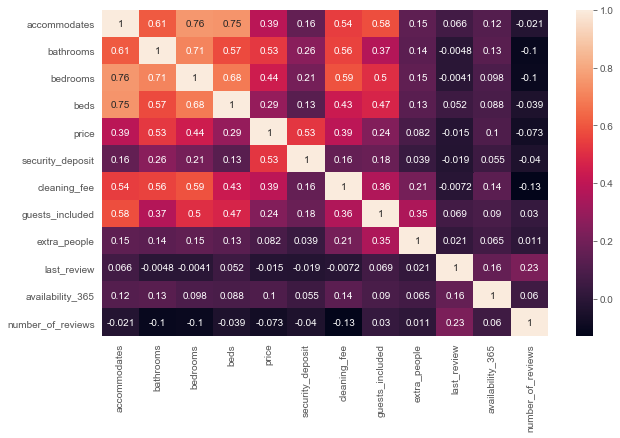

In [132]:
corr=df.corr()
sns.heatmap(corr,annot=True)

#### From above results we can see that Price does have a significant correlation level with accomodates, bathrooms, bedrooms, and secuirty deposit.

bedrooms
0.0      4794
1.0     25745
1.5        46
2.0      7826
3.0      3529
4.0      1491
5.0       670
6.0       199
7.0        97
8.0        32
9.0        13
10.0       11
11.0        6
12.0        2
13.0        1
16.0        1
17.0        1
22.0        1
Name: price, dtype: int64


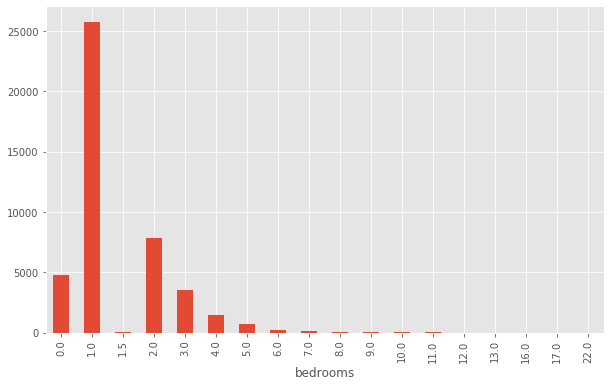

In [80]:
print(df.groupby("bedrooms")["price"].count())
df.groupby("bedrooms")["price"].count().plot.bar()

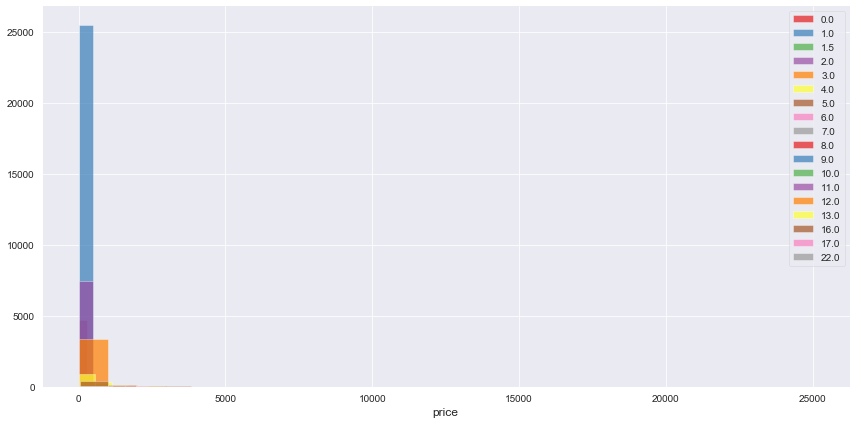

In [85]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="bedrooms",palette='Set1',height=6,aspect=2)
g = g.map(plt.hist,'price',bins=20,alpha=0.7)
plt.legend()

#### From the above facet grid, we can see majority of house price ranges between 10 to 200 dollars approximately in Utah. Also, majority of 1,2 and 3 bedrooms apartments are sold under 150 dollars 

In [88]:
# Running a linear regression model with target variable as Price and other variables as predictors
lm_model = sm.ols(formula="price ~ accommodates + bathrooms + bedrooms + beds + security_deposit + cleaning_fee + guests_included + extra_people + last_review + availability_365 + number_of_reviews", data=df).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3496.
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:39:15   Log-Likelihood:            -3.3288e+05
No. Observations:               44465   AIC:                         6.658e+05
Df Residuals:                   44453   BIC:                         6.659e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           356.8121    323.591      1.103      0.270    -277.432     991.057
accommodates         27.3417      1.437     19.027      0.000      24.525      30.158
bathrooms           187.2719      3.192     58.670      0.000     181.016     193.528
bedrooms             41.4989      3.364     12.335      0.000      34.905      48.093
beds                -38.4464      1.946    -19.762      0.000     -42.260     -34.633
security_deposit      0.1123      0.001    114.041      0.000       0.110       0.114
cleaning_fee          0.6727      0.031     21.842      0.000       0.612       0.733
guests_included     -14.1578      1.503     -9.417      0.000     -17.105     -11.211
extra_people          0.0438      0.083      0.530      0.596      -0.118       0.206
last_review          -0.0136      0.007     -1.824      0.068      -0.028       0.001
availability_365      0.0811      0.015      5.312      0.000       0.051       0.111
number_of_reviews    -0.0303      0.036     -0.849      0.396      -0.100       0.040
==============================================================================
Omnibus:                    84110.582   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        400785920.591
Skew:                          14.178   Prob(JB):                         0.00
Kurtosis:                     467.242   Cond. No.                     6.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-squared value of a good regression model should be ideally greater than 0.8, but as we can see from above results that the R-squared value is 0.46 which is not considered great for this model. So we would consider this as a fair model.

In [102]:
from sklearn.model_selection import train_test_split
final_df=df.drop(["property_type","room_type","amenities"],axis=1)

In [103]:
X=final_df.drop("price",axis=1)
y=final_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lm= LinearRegression()

In [106]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

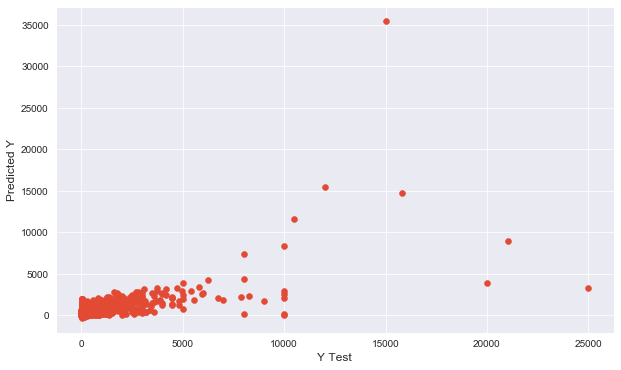

In [108]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### The scatter plot shows there is a fair enough linear relationship between the actual and predicted values. 

In [109]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 136.49930926265097
MSE: 206562.9603212936
RMSE: 454.4919804807271


#### Scatter plot shows that our predictions are good enough as they show a linear relationship. Also, the MAE and RMSE error values are low which means that the accuracy is pretty good.

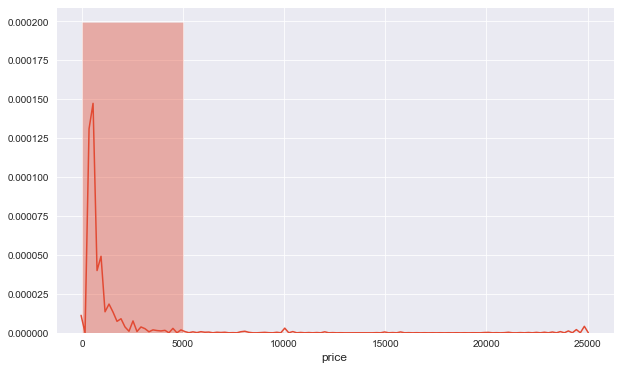

In [110]:
sns.distplot(y_test,bins=5);

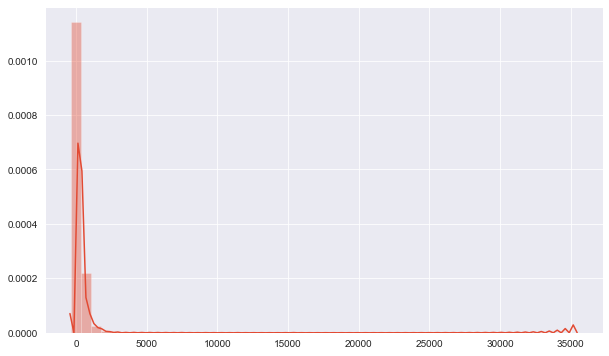

In [111]:
sns.distplot((predictions),bins=50);

In [112]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
accommodates,29.390987
bathrooms,186.186643
bedrooms,36.570062
beds,-38.105049
security_deposit,0.132521
cleaning_fee,0.711598
guests_included,-18.617044
extra_people,0.155393
last_review,-0.013933
availability_365,0.068075


In [7]:
pwd()

'/Users/basillatif/Desktop'

In [9]:
#Now we will look at the results when the price vairable is transformed
df2 = pd.read_csv('airbnb_final_transformed.csv')
df2=df2.drop(['id'], axis=1)
df2=df2.drop(['price'], axis=1)
df2.tail()

FileNotFoundError: [Errno 2] File b'airbnb_final_transformed.csv' does not exist: b'airbnb_final_transformed.csv'

In [2]:
df2.price_transformed.unique()

NameError: name 'df2' is not defined

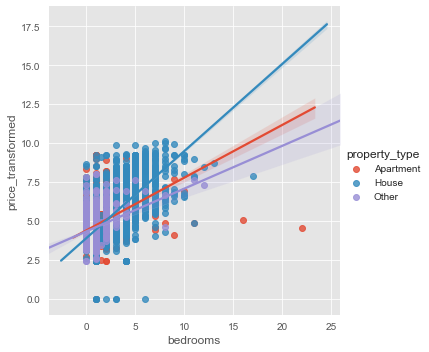

In [140]:
sns.lmplot("bedrooms","price_transformed", data=df2, hue="property_type")

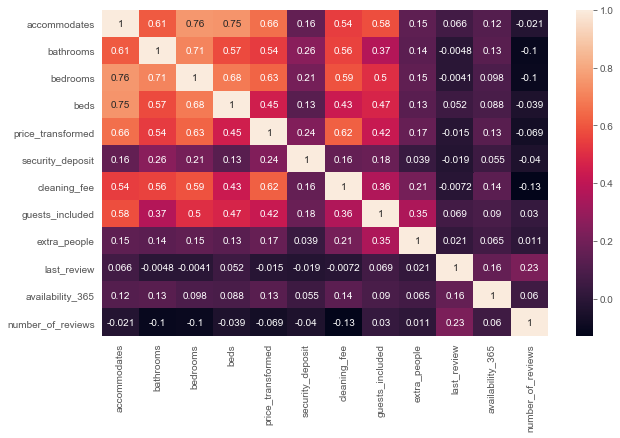

In [141]:
corr=df2.corr()
sns.heatmap(corr,annot=True)

In [142]:
lm_model = sm.ols(formula="price_transformed ~ accommodates + bathrooms + bedrooms + beds + security_deposit + cleaning_fee + guests_included + extra_people + last_review + availability_365 + number_of_reviews", data=df2).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     5302.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:10:41   Log-Likelihood:                -37606.
No. Observations:               44465   AIC:                         7.524e+04
Df Residuals:                   44453   BIC:                         7.534e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.5890      0.423     20.318      0.000       7.760       9.418
accommodates          0.1401      0.002     74.611      0.000       0.136       0.144
bathrooms             0.0360      0.004      8.639      0.000       0.028       0.044
bedrooms              0.1421      0.004     32.324      0.000       0.133       0.151
beds                 -0.0915      0.003    -36.004      0.000      -0.096      -0.087
security_deposit   3.455e-05   1.29e-06     26.862      0.000     3.2e-05    3.71e-05
cleaning_fee          0.0029   4.02e-05     73.003      0.000       0.003       0.003
guests_included       0.0052      0.002      2.666      0.008       0.001       0.009
extra_people          0.0007      0.000      6.491      0.000       0.000       0.001
last_review          -0.0001   9.73e-06    -11.074      0.000      -0.000   -8.86e-05
availability_365      0.0002   1.99e-05      8.149      0.000       0.000       0.000
number_of_reviews  5.938e-05   4.66e-05      1.274      0.203    -3.2e-05       0.000
==============================================================================
Omnibus:                     6037.554   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70203.751
Skew:                           0.225   Prob(JB):                         0.00
Kurtosis:                       9.139   Cond. No.                     6.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
from sklearn.model_selection import train_test_split
final_df2=df2.drop(["property_type","room_type","amenities"],axis=1)

NameError: name 'df2' is not defined

In [146]:
X=final_df2.drop("price_transformed",axis=1)
y=final_df2["price_transformed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lm= LinearRegression()

In [149]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

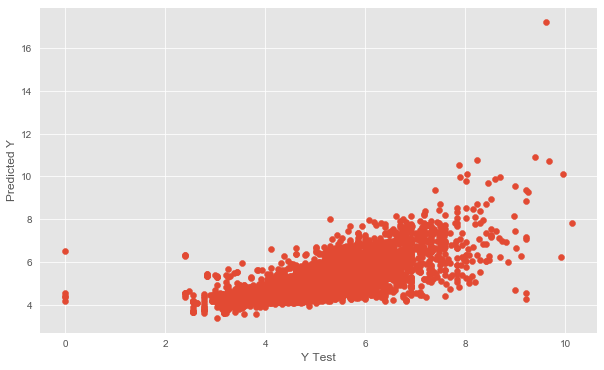

In [151]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [152]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.40526327873654766
MSE: 0.317542539657527
RMSE: 0.5635091300569379


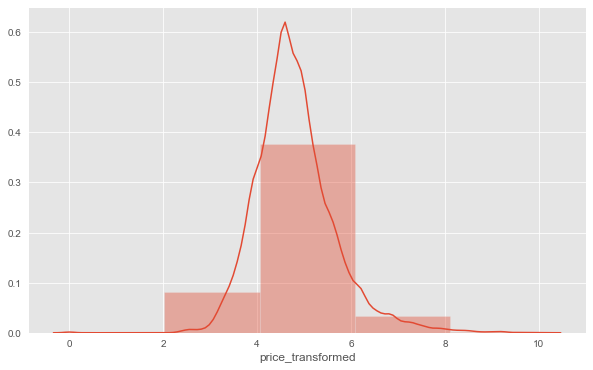

In [153]:
sns.distplot(y_test,bins=5);

In [154]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
accommodates,0.139872
bathrooms,0.037133
bedrooms,0.141115
beds,-0.088626
security_deposit,0.000041
cleaning_fee,0.002918
guests_included,0.003397
extra_people,0.000586
last_review,-0.000113
availability_365,0.000157
